# 1. 데이터셋 확인

### 1.1 Null data check

In [1]:
# 라이브러리 불러오기

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# matplotlib 스타일 중, 'seaborn' 스타일 사용
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 데이터셋의 null 데이터를 쉽게 보여주는 라이브러리
import missingno as msno 

# warnings을 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 그리면 노트북에 바로바로 보여지게하기
%matplotlib inline

In [8]:
#데이터 불러오기
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [9]:
# 데이터 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# 형태 
df_train.shape # 892행 12열

(891, 12)

In [15]:
# 각 열의 통계적 수치를 알려줌
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
# columns를 return 해줘
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
# for문으로 이용하여 각 열의 NaN 비율 구하기
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    # :> 오른쪽 정렬 (< 하면 왼쪽정렬)
    # (df_train[col].isnull().sum() / df_train[col].shape[0])) 
        # --> 열에서 null 갯수를 다 더해서, 행의 수로 나눈다.

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [19]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

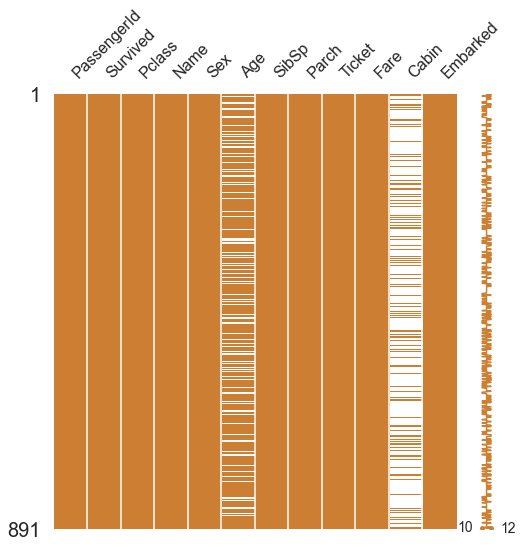

In [21]:
# 매트릭스 형태로 만들어 null 파악하기
# df에 iloc([행, 열])를 준다. [:, :]을 줬으니 그냥 다 가지고 오겠다는 의미.
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [22]:
# 빈칸이 null이다. 
# 어느 위치에 null데이터가 존재하는지, 분포를 알기에 좋음

<AxesSubplot:>

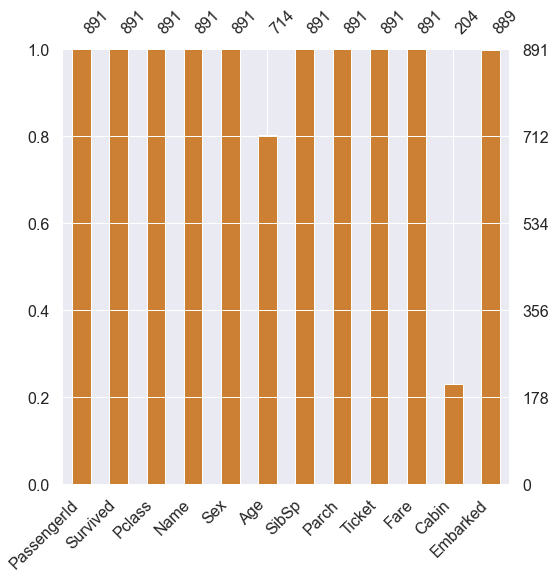

In [23]:
# bar 그래프로 null 파악하기
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [24]:
# 몇개 있는지, 얼마나 있는지 파악하기 좋음

### 1.2 Target label 확인

target label이 얼마나 밸런스있게 데이터셋에 있느냐, 밸러스 있지 않느냐에 따라 모델을 평가하는 방식, 모델을 세우는 방식이 많이 달라진다.

따라서 항상 우리가 목적으로 하는 target label이 어떠한 분포를 가졌는지 꼭 확인해야함

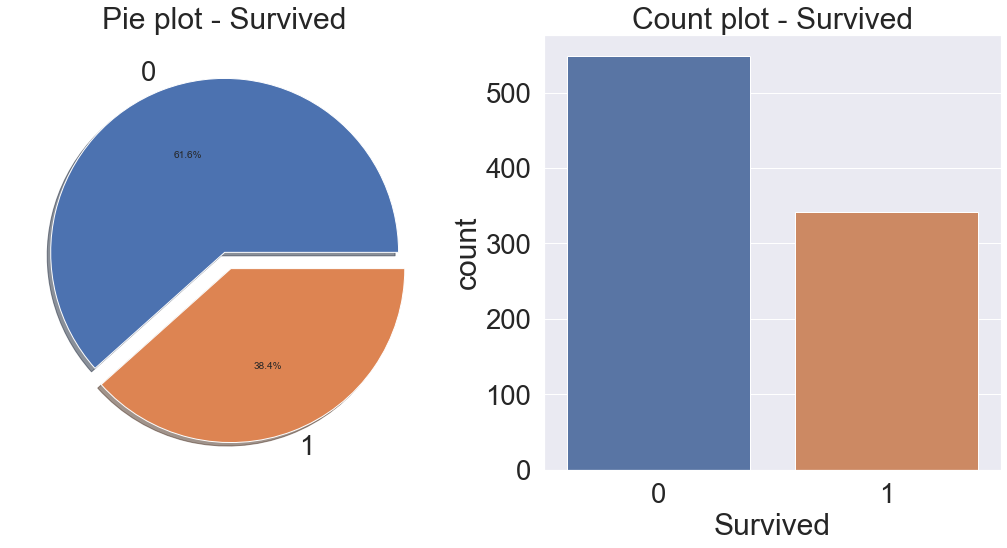

In [27]:
# 도화지를 준비하는과정. sub는 부분부분을 이야기하는거니까 ! 
# subplots(row, column, figsize=(가로, 세로) )
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 하나의 행에 두개의 파트로 나눠진 도화지

# value_counts : 각 label의 갯수를 반환
# 시리즈들은 .plot() 을 가지고 있다. 파이로 그리고싶으면 뒤에 붙이면됨.
# explode : 각 파이의 간격
# autopct : 파이에 있는 퍼센트를 나타내주는것
# ax : 도화지 어떤 부분에 그릴래 (여기선 첫번째)
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived') # 제목
ax[0].set_ylabel('') # y축 (여기선 레이블 없애겠다는 의미)

# countplot : 말그대로 count를 해주는 plot
# countplot('열이름', data=데이터)
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# 2. Exploratory data analysis

### 2.1 Pclass

In [28]:
# 배의 등급을 나타낸다.
# 카테고리형인 서술형 데이터

In [36]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
    # 1. 'Pclass'와 'Survived'를 가져와
    # 2. groupby 묶는다. 여기서는 'Pclass'로.
        # as_index : Pclass를 index로 두느냐
    # 3. 객체는 많은 메소드를 가지고 있다. 여기서는 count로 몇개있는지 세어줘.

,Survived
Pclass,
1,216
2,184
3,491


In [37]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
    # margins : All이 있거나 없거나
    # background_gradient : 백그라운드색을바꾸겠다_기울어지는형태에따라(cmap(colormap)='')
        # 값에 따라 색의 간격을 줘서 보기 편하도록 만들기
        # color map scheme 검색하면 여러가지 나온다 ! 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

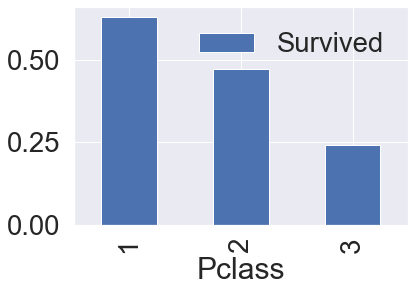

In [43]:
# mean을 이용하여 생존률 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
    # sort_values : 순서대로 정렬 (어떻게 할까 --> by =''주면 됨.)
        # ascending=False 하면 반대로됨 (여기서는 내림차순으로)
    # 시리즈 형태니까 plot 그리기 가능 ~!

Pclass가 높을 수록 생존률이 높은 것을 확인할 수 있다.

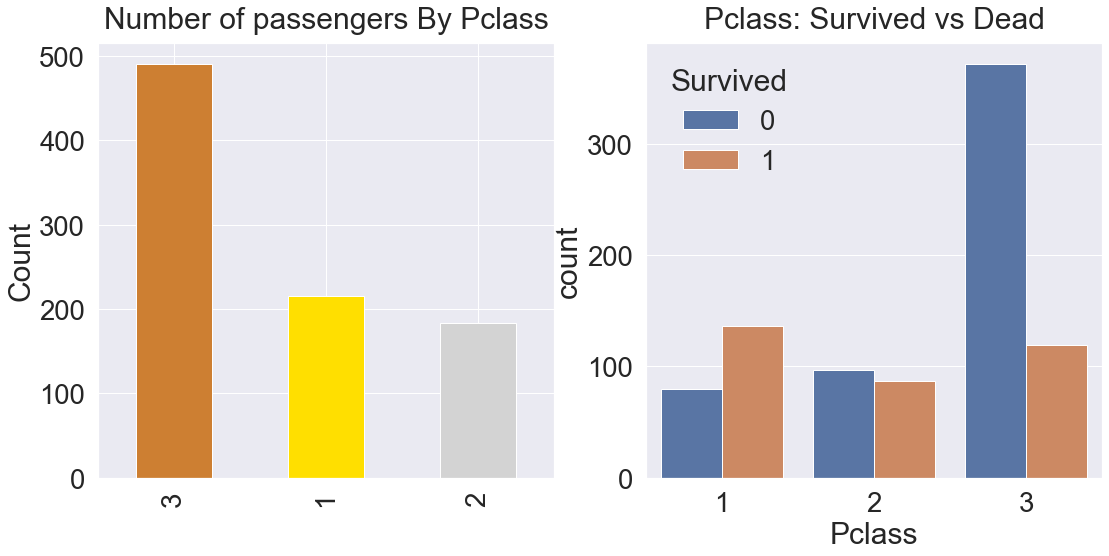

In [45]:
# 도화지 준비
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 그리기
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # hue : 색을 나눠서 구분하여 보여주기
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

Pclass의 total count는 3번째 class가 가장 많고 그다음 1, 2이지만,

생존확률만 봤을때는 1 class 일 때 생존을 많이 했다고 결론 낼 수 있다.